In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from previous processing

In [ ]:
data_directory = "../../Downloads/ml-latest/"
movieDatasetFile_filtered = 'movie_full_dataset_filtered.csv'
ratingDatasetFile_filtered = 'rating_full_dataset_normalized_filtered.csv'
df_ratingDataset_filtered = pd.read_csv(data_directory + ratingDatasetFile_filtered)
df_movieDataset_filtered = pd.read_csv(data_directory + movieDatasetFile_filtered)

In [68]:
print(len(df_ratingDataset_filtered))
print(len(df_movieDataset_filtered))

25451571
49800


In [62]:
moviesWithRatings = list(np.unique(df_ratingDataset_filtered['movie_id']))

In [81]:
raterIds = np.unique(df_ratingDataset_filtered['rater_id'])
print(len(raterIds))

282695


# Distributions of number of ratings for each movie/rater

In [71]:
numRatingsPerRater = {rId : 0 for rId in raterIds}
numRatingsPerMovie = {mId : 0 for mId in moviesWithRatings}
for i in range(len(df_ratingDataset_filtered)):
    row = df_ratingDataset_filtered.iloc[i]
    numRatingsPerRater[row['rater_id']] += 1
    numRatingsPerMovie[row['movie_id']] += 1

(array([4.4759e+04, 1.4730e+03, 7.7600e+02, 4.7800e+02, 3.0400e+02,
        2.5700e+02, 1.7800e+02, 1.4100e+02, 1.3000e+02, 1.2000e+02,
        8.1000e+01, 9.5000e+01, 7.5000e+01, 5.8000e+01, 5.7000e+01,
        5.3000e+01, 4.1000e+01, 4.1000e+01, 5.5000e+01]),
 array([    0.        ,   526.31578947,  1052.63157895,  1578.94736842,
         2105.26315789,  2631.57894737,  3157.89473684,  3684.21052632,
         4210.52631579,  4736.84210526,  5263.15789474,  5789.47368421,
         6315.78947368,  6842.10526316,  7368.42105263,  7894.73684211,
         8421.05263158,  8947.36842105,  9473.68421053, 10000.        ]),
 <a list of 19 Patch objects>)

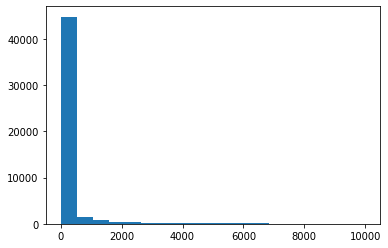

In [78]:
bins = list(np.linspace(0, 10000, 20))
plt.hist(numRatingsPerMovie.values(), bins = bins)

(array([44973., 71248., 29633., 19163., 14614., 11612.,  9252.,  7316.,
         6257.,  6450.,  5019.,  4345.,  3775.,  3319.,  2975.,  2655.,
         2306.,  2059.,  2138.,  1924.,  1664.,  1617.,  1409.,  1375.,
         1206.,     0.,  7811.,  4630.,  3029.,  2138.,  1453.,  1084.,
          815.,   602.,   523.,     0.,  1095.,   500.,   249.]),
 array([   0.        ,   10.        ,   20.        ,   30.        ,
          40.        ,   50.        ,   60.        ,   70.        ,
          80.        ,   90.        ,  100.        ,  110.        ,
         120.        ,  130.        ,  140.        ,  150.        ,
         160.        ,  170.        ,  180.        ,  190.        ,
         200.        ,  210.        ,  220.        ,  230.        ,
         240.        ,  250.        ,  250.        ,  333.33333333,
         416.66666667,  500.        ,  583.33333333,  666.66666667,
         750.        ,  833.33333333,  916.66666667, 1000.        ,
        1000.        , 1266.666666

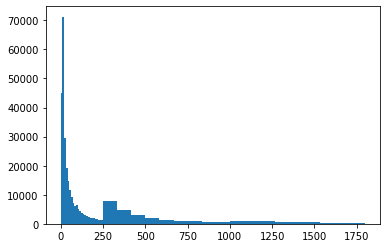

In [118]:
bins = list(np.linspace(0, 250, 26)) + list(np.linspace(250, 1000, 10)) + list(np.linspace(1000, 1800, 4))
plt.hist(numRatingsPerRater.values(), bins = bins)

In [152]:
print(np.mean(list(numRatingsPerMovie.values())), np.median(list(numRatingsPerMovie.values())))

511.0757228915663 7.0


In [153]:
print(np.max(list(numRatingsPerMovie.values())))

97999


In [143]:
print(np.mean(list(numRatingsPerRater.values())))
print(np.median(list(numRatingsPerRater.values())))

90.03191071649658
28.0


# Sort out raters who have fewer ratings and mainly rate over-represented movies (with > 5000 ratings)

In [112]:
moviesOver5000 = [i for i in numRatingsPerMovie.keys() if numRatingsPerMovie[i] > 5000]

## filter raters with <= 10 ratings

In [119]:
ratersTen = [i for i in numRatingsPerRater.keys() if numRatingsPerRater[i] < 10]
print(len(ratersTen))

44973


In [121]:
threshold = 0.5
count = 0
total = len(ratersTen)
ratersRemove = []
for r in ratersTen:
    df1 = df_ratingDataset_filtered[df_ratingDataset_filtered['rater_id'] == r]
    df2 = df1[~df1['movie_id'].isin(moviesOver5000)]
    if len(df2) / len(df1) < threshold:
        ratersRemove.append(r)
    count += 1
    if (count % 1000 == 0):
        print(f'{count} processed {total - count} left')
print(len(ratersRemove))

1000 processed 43973 left
2000 processed 42973 left
3000 processed 41973 left
4000 processed 40973 left
5000 processed 39973 left
6000 processed 38973 left
7000 processed 37973 left
8000 processed 36973 left
9000 processed 35973 left
10000 processed 34973 left
11000 processed 33973 left
12000 processed 32973 left
13000 processed 31973 left
14000 processed 30973 left
15000 processed 29973 left
16000 processed 28973 left
17000 processed 27973 left
18000 processed 26973 left
19000 processed 25973 left
20000 processed 24973 left
21000 processed 23973 left
22000 processed 22973 left
23000 processed 21973 left
24000 processed 20973 left
25000 processed 19973 left
26000 processed 18973 left
27000 processed 17973 left
28000 processed 16973 left
29000 processed 15973 left
30000 processed 14973 left
31000 processed 13973 left
32000 processed 12973 left
33000 processed 11973 left
34000 processed 10973 left
35000 processed 9973 left
36000 processed 8973 left
37000 processed 7973 left
38000 process

In [142]:
len(df_ratingDataset_filtered[df_ratingDataset_filtered['rater_id'].isin(ratersTen)])

220125

In [122]:
len(df_ratingDataset_filtered[df_ratingDataset_filtered['rater_id'].isin(ratersRemove)])

185014

In [144]:
ratersExactTen = [i for i in numRatingsPerRater.keys() if numRatingsPerRater[i] == 10]
print(len(ratersExactTen))

5736


In [145]:
threshold = 0.5
count = 0
total = len(ratersExactTen)
ratersRemove0 = []
for r in ratersExactTen:
    df1 = df_ratingDataset_filtered[df_ratingDataset_filtered['rater_id'] == r]
    df2 = df1[~df1['movie_id'].isin(moviesOver5000)]
    if len(df2) / len(df1) < threshold:
        ratersRemove0.append(r)
    count += 1
    if (count % 1000 == 0):
        print(f'{count} processed {total - count} left')
print(len(ratersRemove0))

1000 processed 4736 left
2000 processed 3736 left
3000 processed 2736 left
4000 processed 1736 left
5000 processed 736 left
4893


## filter raters with > 10 and < 20 ratings

In [123]:
ratersTenTwenty = [i for i in numRatingsPerRater.keys() if numRatingsPerRater[i] > 10 and numRatingsPerRater[i] < 20]
print(len(ratersTenTwenty))

65512


In [126]:
threshold = 0.5
count = 0
total = len(ratersTenTwenty)
ratersRemove2 = []
for r in ratersTenTwenty:
    df1 = df_ratingDataset_filtered[df_ratingDataset_filtered['rater_id'] == r]
    df2 = df1[~df1['movie_id'].isin(moviesOver5000)]
    if len(df2) / len(df1) < threshold:
        ratersRemove2.append(r)
    count += 1
    if (count % 5000 == 0):
        print(f'{count} processed {total - count} left')
print(len(ratersRemove2))

5000 processed 60512 left
10000 processed 55512 left
15000 processed 50512 left
20000 processed 45512 left
25000 processed 40512 left
30000 processed 35512 left
35000 processed 30512 left
40000 processed 25512 left
45000 processed 20512 left
50000 processed 15512 left
55000 processed 10512 left
60000 processed 5512 left
65000 processed 512 left
57241


In [141]:
len(df_ratingDataset_filtered[df_ratingDataset_filtered['rater_id'].isin(ratersTenTwenty)])

977103

In [127]:
len(df_ratingDataset_filtered[df_ratingDataset_filtered['rater_id'].isin(ratersRemove2)])

857365

## filter raters with  >= 10 and < 40 ratings

In [146]:
ratersTwentyForty = [i for i in numRatingsPerRater.keys() if numRatingsPerRater[i] >= 20 and numRatingsPerRater[i] < 40]
print(len(ratersTwentyForty))

48796


In [147]:
threshold = 0.5
count = 0
total = len(ratersTwentyForty)
ratersRemove3 = []
for r in ratersTwentyForty:
    df1 = df_ratingDataset_filtered[df_ratingDataset_filtered['rater_id'] == r]
    df2 = df1[~df1['movie_id'].isin(moviesOver5000)]
    if len(df2) / len(df1) < threshold:
        ratersRemove3.append(r)
    count += 1
    if (count % 5000 == 0):
        print(f'{count} processed {total - count} left')
print(len(ratersRemove3))

5000 processed 43796 left
10000 processed 38796 left
15000 processed 33796 left
20000 processed 28796 left
25000 processed 23796 left
30000 processed 18796 left
35000 processed 13796 left
40000 processed 8796 left
45000 processed 3796 left
46240


In [150]:
len(df_ratingDataset_filtered[df_ratingDataset_filtered['rater_id'].isin(ratersTwentyForty)])

1368062

In [151]:
len(df_ratingDataset_filtered[df_ratingDataset_filtered['rater_id'].isin(ratersRemove3)])

1298727

## So far, 2 million ratings will be removed from 25 million ratings

In [159]:
ratersRemoveAll = ratersRemove0 + ratersRemove + ratersRemove2 + ratersRemove3
print(len(ratersRemoveAll), len(df_ratingDataset_filtered[df_ratingDataset_filtered['rater_id'].isin(ratersRemoveAll)]))

145929 2390036


In [160]:
df_ratingDataset_filtered_further = df_ratingDataset_filtered[~df_ratingDataset_filtered['rater_id'].isin(ratersRemoveAll)]
print(len(df_ratingDataset_filtered_further))

23061535


# Down-sample movies with more ratings to formulate a compact dataset

### Till now, we have 23 million ratings left.

### Map 1000 ~ 51000 ratings to 1000 ~ 2000 ratings: f(x) = 1000 + (x-1000)//50
### If downsample moviesOver1000 using the above map, then we yield 3 ~ 6 million out of 22 million ratings

In [166]:
def getSampleNumber(num):
    return 1000 + min((num - 1000) // 50, 1000)

In [135]:
moviesOver1000 = [i for i in numRatingsPerMovie.keys() if numRatingsPerMovie[i] > 1000]
print(len(moviesOver1000))

3668


In [173]:
ratingDatasetFile_compact = "rating_compact_dataset.csv"
m = moviesOver1000[0]
n = getSampleNumber(numRatingsPerMovie[m])
df1 = df_ratingDataset_filtered_further[df_ratingDataset_filtered_further['movie_id'] == m].sample(n)
df1.to_csv(data_directory + ratingDatasetFile_compact, index=False)
count = len(df1)
c = 1
total = len(moviesOver1000)
for m in moviesOver1000[1:]:
    df0 = df_ratingDataset_filtered_further[df_ratingDataset_filtered_further['movie_id'] == m]
    if len(df0) > 1000:
        n = getSampleNumber(numRatingsPerMovie[m])
        df1 = df0.sample(n)
        df1.to_csv(data_directory + ratingDatasetFile_compact, mode='a', header=False, index=False)
        count += len(df1)
    else:
        df0.to_csv(data_directory + ratingDatasetFile_compact, mode='a', header=False, index=False)
        count += len(df0)
    c += 1
    if c % 100 == 0:
        print(f"{c} processed {total - c} left")
print(count)

100 processed 3568 left
200 processed 3468 left
300 processed 3368 left
400 processed 3268 left
500 processed 3168 left
600 processed 3068 left
700 processed 2968 left
800 processed 2868 left
900 processed 2768 left
1000 processed 2668 left
1100 processed 2568 left
1200 processed 2468 left
1300 processed 2368 left
1400 processed 2268 left
1500 processed 2168 left
1600 processed 2068 left
1700 processed 1968 left
1800 processed 1868 left
1900 processed 1768 left
2000 processed 1668 left
2100 processed 1568 left
2200 processed 1468 left
2300 processed 1368 left
2400 processed 1268 left
2500 processed 1168 left
2600 processed 1068 left
2700 processed 968 left
2800 processed 868 left
2900 processed 768 left
3000 processed 668 left
3100 processed 568 left
3200 processed 468 left
3300 processed 368 left
3400 processed 268 left
3500 processed 168 left
3600 processed 68 left
4039311


In [174]:
df = pd.read_csv(data_directory + ratingDatasetFile_compact)
print(len(df))
df.head()

4039311


,rater_id,movie_id,rating,timestamp
0,45574,1,0.318182,1439422527
1,118362,1,0.063604,1384960898
2,71963,1,0.072266,965489170
3,253903,1,0.138084,1175013173
4,111325,1,-0.225100,1491573390


# Create a compact movie dataset to draw movies from popular movies

In [ ]:
print(len(df_movieDataset_filtered))
df_movieDataset_popular = df_movieDataset_filtered[df_movieDataset_filtered['movie_id'].isin(moviesOver5000)]
print(len(df_movieDataset_popular))

In [185]:
movieDatasetFile_popular = "movie_popular_dataset.csv"
df_movieDataset_popular.to_csv(data_directory + movieDatasetFile_popular, index=False)